# Project 1. Dimension Reduction Using SVD and PCA

### Student ID: 915030521
### Student Name: Chenghan Sun

In [1]:
# All Import Statements Defined Here
# Note: Do not change anything

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.image import imread

from numpy.linalg import svd
from sklearn.decomposition import PCA
import os
from sklearn.datasets import load_digits

%matplotlib inline

## Part 1. SVD Image Compression

### Load Data (do not change the code !) 

In [2]:
## image1 should be data.png, which is contained in the project zip file
## image2 should be your own colored face photo in png format named as 
## photo.png with a size no larger than 600x600

image1 = imread(os.getcwd()+'/data.png')
image2 =  imread(os.getcwd()+'/photo.png')

image1 = image1[:,:,:3]
image2 = image2[:,:,:3]

## store the images in image_dict with name lake for image1 and name photo for image2

image_dict = {'lake':image1,'photo':image2}

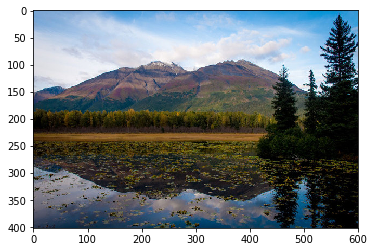

In [3]:
plt.imshow(image_dict['lake'])

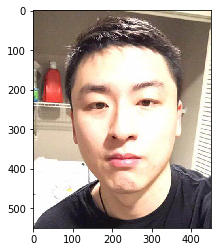

In [4]:
plt.imshow(image_dict['photo'])

In [5]:
image_dict['photo'].shape

(550, 450, 3)

<font color='red'>Add a bit of introduction to yourself here, like your name, major, year, background, interets etc.</font>

**My Intro**:

I'm Chenghan Sun, third year PhD student in the Department of Chemical Engineering. For technical perspective, my background generally lies on computational science/engineering disciplines. For personal perspective, I interest in music production and soccer.

### Write a function to get the compressed matrix

In [63]:
def compress_svd(image, k):
    """
    use svd decomposition to perform image compression
    use the svd function from numpy.linalg to perfrom the svd decomposition
    use the first k singular values to reconstruct the compressed matrix
    """
    ## write your code here
    U, sigma, V = svd(image)
    top_U = U[:,:k]
    top_sigma = np.diag(sigma[:k])
    top_V = V[:k,:]
    compressed_image = np.dot(top_U, np.dot(top_sigma, top_V))
    ##end of your code
    return compressed_image

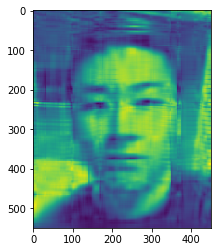

In [68]:
"""Test function compress_svd
"""
compressed_image = compress_svd(image2[:,:,2], 10)
plt.imshow(compressed_image)

### Write the following functions to compress the images differently

In [69]:
def compress_show_images_reshape(image_name,k,show_image=True):
    """
    image_name (string): image name in the image_dict 
    k (int): number of singular value for image compression
    show_image (boolean): whether to plot the compressed functions
    
    Concatenate the first three layers of the image tensor into one wide matrix
    Use compress_svd function to perform svd compression
    Reshape the wide compressed matrix into an image tensor of three layers
    if show_image is true, plot the compressed image
    put the number of singular values and reconstruction error in the title
    
    return reconst_error (float), which is the mean squared error of the compressed image
    
    """
    ## your code starts here
    image = image_dict[image_name]
    compressed_image = np.empty(image.shape)
    concat_layers = np.concatenate([image[:,:,i] for i in range(3)])
    reconst_image = compress_svd(concat_layers, k)
    for i in range(3):
        compressed_image[:, :, i] = reconst_image[i*image.shape[0]:(i+1)*image.shape[0],:]
    
    reconst_error = np.mean((compressed_image - image)**2)
    if show_image:
        plt.title(f"Compressed_image: k = {k}, reconst_error = {reconst_error}")
        plt.imshow(compressed_image)
    ## end of your code
    return reconst_error


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


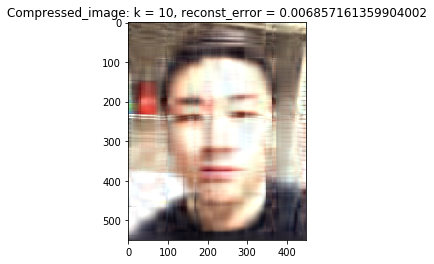

In [81]:
"""Test
"""
image_re_shape = compress_show_images_reshape('photo', 10)

In [93]:
def compress_show_images_separate(image_name,k,show_image=True):
    """
    image_name (string): image name in the image_dict 
    k (int): number of singular value for image compression
    show_image (boolean): whether to plot the compressed functions
    
    Use compress_svd function to perform svd compression for each of the three layers of the image tensor
    if show_image is true, plot the compressed image
    put the number of singular values and reconstruction error in the title
    
    return reconst_error (float), which is the mean squared error of the compressed image
    """
    ## your code starts here
    image = image_dict[image_name]
    compressed_image = np.empty(image.shape)
    dim_list = [image[:, :, 0], image[:, :, 1], image[:, :, 2]]  # notice the RBG 3 dimensions
    
    for i, dim in enumerate(dim_list):
        reconst_image = compress_svd(dim, k)
        compressed_image[:, :, i] = reconst_image
        
    reconst_error = np.mean((compressed_image - image)**2)
    if show_image:
        plt.title(f"Compressed_image: k = {k}, reconst_error = {reconst_error}")
        plt.imshow(compressed_image)
    ## end of your code
    return reconst_error


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.002181117220052127

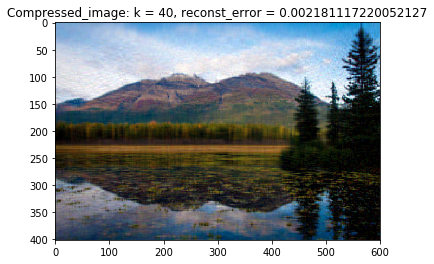

In [94]:
compress_show_images_separate('lake',40)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.002472806558468481

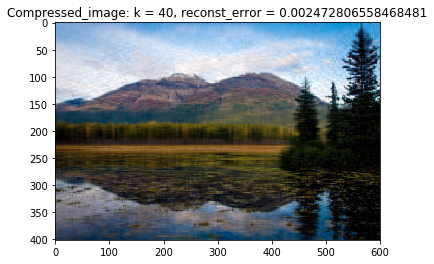

In [90]:
compress_show_images_reshape('lake',40)

### Write a function to plot the reconstruction errors and their differences 

In [ ]:
def plot_error(image_name,k_min,k_max):
    """
    image_name (string): image name in the image_dict 
    k_min (int): minimum number of singular values used for image compression
    k_max (int): maximum number of singular values used for image compression

    plot the reconstruction errors using k between k_min and k_max
    use a blue line to indicate the reconstruction error using compress_show_images_reshape function
    use a orange line to indicate the reconstruction error using compress_show_images_reshape function
    in a separate subfigure, plot the difference of the reconstruction errors for each k between k_min and k_max
    
    describe briefly what you see (is one error always smaller than the other? is the difference monotonic?)
    """ 
    
    ## your code starts here
    

    
    
    
    
    

    ## end of your code


## <font color="Red"> Run the following code.</font> (do not change the code!)

In [ ]:
plot_error('lake',2,20)

In [96]:
[compress_show_images_separate('lake',k,False) for k in [1,5,10,20,30,40,200]]

[0.018221028176326808,
 0.007389941480164196,
 0.0052790843724458214,
 0.0035794618250347197,
 0.0027349212523899488,
 0.002181117220052127,
 0.00015072131719842165]

In [82]:
[compress_show_images_reshape('lake',k,False) for k in [1,5,10,20,30,40,200]]  # changed 20000 -> 200

[0.018789833270296628,
 0.007813924611025954,
 0.0056275697620723755,
 0.0039091725905613965,
 0.003041043721082541,
 0.002472806558468481,
 0.00027804893704617354]

In [43]:
from ipywidgets import interact

In [ ]:
interact(compress_show_images_reshape,image_name=['lake','photo'], k=(10,70))

## Part 2. PCA of hand-written digits

### Load data

In [ ]:
digits = load_digits()
plt.imshow(digits.images[0],cmap='gray') 

### Check the covariance matrix

In [ ]:
mu=digits.data.mean(axis=0)
X=digits.data
X_bar=np.repeat(mu,X.shape[0]).reshape(len(mu),-1).T
cov=np.dot( (X-X_bar).T, X-X_bar )

## What do you find? Not full rank!

np.linalg.matrix_rank(cov)


### Now use PCA function to use a 2-dim subspace to reconstruct the digits 

In [ ]:
## X_new is a list of lists which contains the first two PC for each digit
## X_inv is the reconstructed digit image with the same shape as X
## set the random_state = 12 for the PCA function ! this is important for your grade.

## your code starts here






## end here

### Plot each digits (elements in X_new) with different color labels

In [ ]:
## your code starts here





## end here

### Write a function to do a side-by-side plot of the original digit and the reconstructed digit

In [ ]:
def plot_digits(k):
    """
    the left part is the compressed digit, the right part is the original digit
    """
    ## your code starts here
    

    
    
    
    ## end here

## <font color="Red"> Run the following code.</font> (do not change the code!)

In [ ]:
X_inv[0]

In [ ]:
plot_digits(100)

# <font color="blue"> Submission Instructions</font>

1. Click the Save button at the top of the Jupyter Notebook.
2. Please make sure to have entered your Student ID above.
3. Select Cell -> All Output -> Clear. This will clear all the outputs from all cells (but will keep the content of ll cells). 
4. Select Cell -> Run All. This will run all the cells in order, and will take several minutes. <font color='red'>You will not get any grade if you don't follow this step strictly.</font>
5. Once you've rerun everything, select File -> Download as -> PDF via LaTeX
6. Look at the PDF file and make sure all your solutions are there, displayed correctly. The PDF is the only thing your graders will see!
7. Submit your PDF on Canvas.